# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install fuzzywuzzy
%pip install fuzzywuzzy[speedup]
%pip install python-Levenshtein
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading Data

In [ ]:
df = pd.read_excel("//content/candyhierarchy2017.xlsx")
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,...,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DES

In [ ]:
df.isna().sum() / len(df)

Internal ID                 0.000000
Q1: GOING OUT?              0.044715
Q2: GENDER                  0.016667
Q3: AGE                     0.034146
Q4: COUNTRY                 0.026016
                              ...   
Q12: MEDIA [Daily Dish]     0.965447
Q12: MEDIA [Science]        0.446341
Q12: MEDIA [ESPN]           0.959756
Q12: MEDIA [Yahoo]          0.972764
Click Coordinates (x, y)    0.347561
Length: 120, dtype: float64

# Exploring the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [ ]:
df.shape

(2460, 120)

# Data cleaning

In [ ]:
df.duplicated().sum()

0

I will remove columns that i didn't had much info about it and coulmns that have a lot of Nan values

In [ ]:
df.drop(['Internal ID','Unnamed: 113', 'Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Click Coordinates (x, y)', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]', 'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]'], axis=1, inplace=True)

In [ ]:
df

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,...,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q9: OTHER COMMENTS,Q10: DRESS,Q11: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,...,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Bottom line is Twix is really the only candy w...,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,M

# First cleaning Q1: GOING OUT?, column

In [ ]:
df['Q1: GOING OUT?'].value_counts()

No     2038
Yes     312
Name: Q1: GOING OUT?, dtype: int64

In [ ]:
df['Q1: GOING OUT?'].isna().sum()

110

In [ ]:
df['Q1: GOING OUT?'] = df['Q1: GOING OUT?'].fillna('rather not to say')

In [ ]:
df['Q1: GOING OUT?'].isna().sum()

0

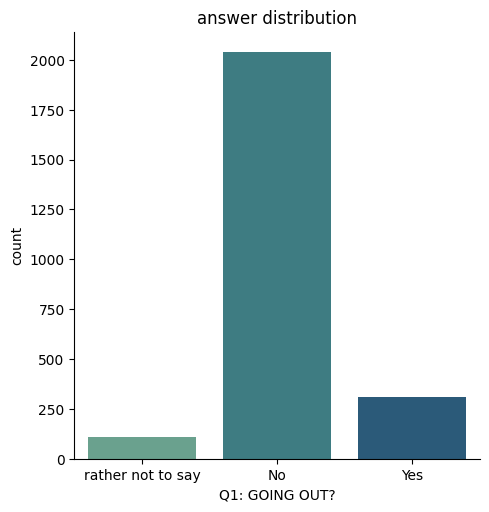

In [ ]:
sns.catplot(x="Q1: GOING OUT?", data=df, kind="count",palette="crest");
plt.title('answer distribution')
plt.show()

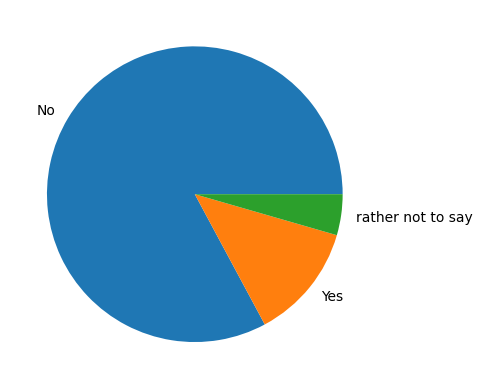

In [ ]:
plt.pie(df['Q1: GOING OUT?'].value_counts(), labels =['No','Yes','rather not to say'])
plt.show()

# Then cleaning Gender column

In [ ]:
df['Q2: GENDER'].value_counts()

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: Q2: GENDER, dtype: int64

In [ ]:
df['Q2: GENDER'].isna().sum()

41

In [ ]:
df['Q2: GENDER'].fillna("I'd rather not say", inplace=True)

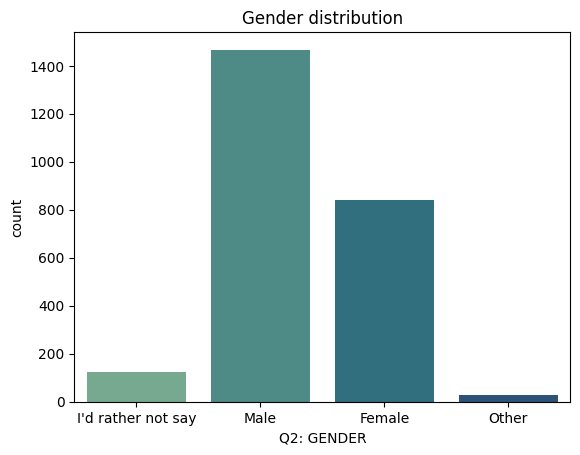

In [ ]:
sns.countplot(x='Q2: GENDER',data=df,palette="crest")
plt.title('Gender distribution')
plt.show()

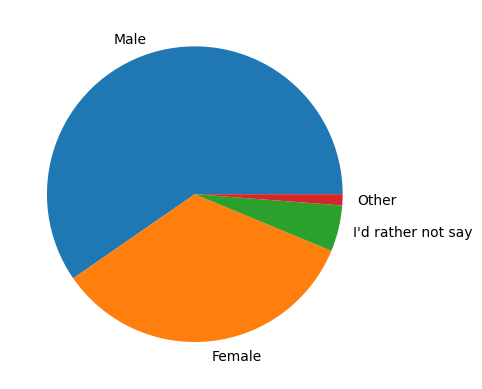

In [ ]:
plt.pie(df['Q2: GENDER'].value_counts(), labels =['Male','Female',"I'd rather not say",'Other'])
plt.show()

# cleaning age column

In [ ]:
df['Q3: AGE'].describe()

count     2376
unique     106
top         40
freq        92
Name: Q3: AGE, dtype: int64

In [ ]:
df['Q3: AGE'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [ ]:
df['Q3: AGE'].replace(39.4, 39, inplace=True)
df['Q3: AGE'].replace('46 Halloweens.', 46, inplace=True)
df['Q3: AGE'].replace('59 on the day after Halloween', 59, inplace=True)
df['Q3: AGE'].replace('sixty-nine', 69, inplace=True)
df['Q3: AGE'].replace(24-50, 25, inplace=True)
df['Q3: AGE'].replace(70.5, 70, inplace=True)


In [ ]:
df['Q3: AGE']=pd.to_numeric(df['Q3: AGE'],errors='coerce')

In [ ]:
for s in df['Q3: AGE']:
    if(s>75 or s<15):
     df['Q3: AGE']=df['Q3: AGE'].replace(s, np.nan)

In [ ]:
df['Q3: AGE'].unique()

array([nan, 44., 49., 40., 23., 53., 33., 43., 56., 64., 37., 59., 48.,
       54., 36., 45., 25., 34., 35., 38., 58., 50., 47., 16., 52., 63.,
       65., 41., 27., 31., 61., 46., 42., 62., 29., 39., 32., 28., 69.,
       67., 30., 22., 26., 51., 70., 24., 18., 19., 57., 60., 66., 55.,
       72., 21., 68., 20., 71., 74., 17., 15., 75., 73.])

In [ ]:
df['Q3: AGE'].astype(float)

0        NaN
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Q3: AGE, Length: 2460, dtype: float64

In [ ]:
df['Q3: AGE'] = df['Q3: AGE'].fillna(df['Q3: AGE'].mean())

In [ ]:
df['Q3: AGE']=df['Q3: AGE'].astype(int)

<ipython-input-34-5266b26de75c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Q3: AGE']);


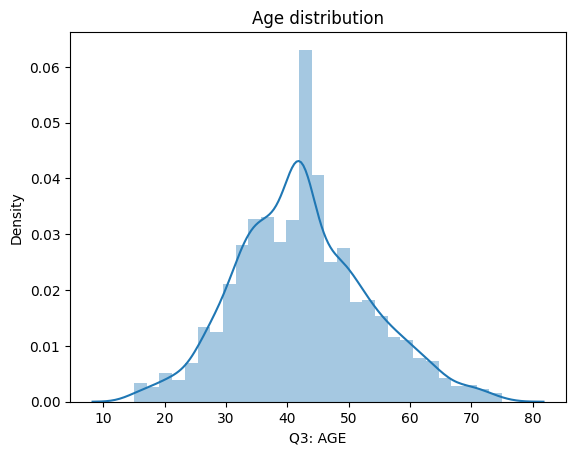

In [ ]:
sns.distplot(df['Q3: AGE']);
plt.title('Age distribution')
plt.show()

<ipython-input-35-ecdbd69150c2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(y='Q3: AGE',x='Q2: GENDER',col='Q1: GOING OUT?',data=df,palette="crest",kind='scatter', height=6, aspect=1)


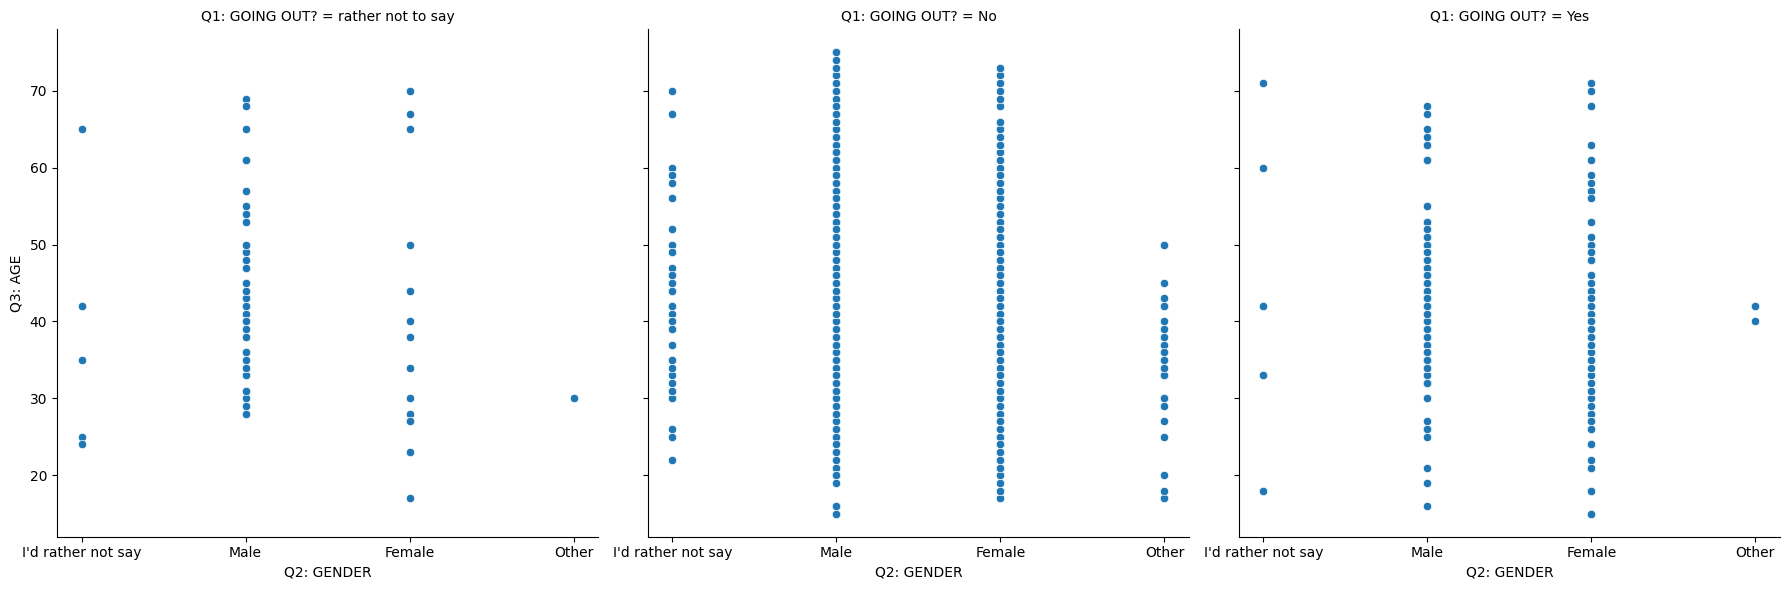

In [ ]:
g = sns.relplot(y='Q3: AGE',x='Q2: GENDER',col='Q1: GOING OUT?',data=df,palette="crest",kind='scatter', height=6, aspect=1)
plt.show()

# cleaning State column

In [ ]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts()

California           132
CA                    89
Texas                 60
Ontario               56
Illinois              55
                    ... 
COLORADO               1
colorado, boulder      1
New Orleans la         1
Ky                     1
québec                 1
Name: Q5: STATE, PROVINCE, COUNTY, ETC, Length: 511, dtype: int64

In [ ]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].isna().sum()

100

In [ ]:
df =df.drop(['Q5: STATE, PROVINCE, COUNTY, ETC'], axis=1)

state column had too much nuique values so i dropped it

# cleaning Day column

In [ ]:
df['Q11: DAY'].mode()

0    Friday
Name: Q11: DAY, dtype: object

In [ ]:
df['Q11: DAY'].value_counts()

Friday    1091
Sunday     644
Name: Q11: DAY, dtype: int64

In [ ]:
df['Q11: DAY'].isna().sum()

725

In [ ]:
df['Q11: DAY'].fillna('none of them', inplace=True)

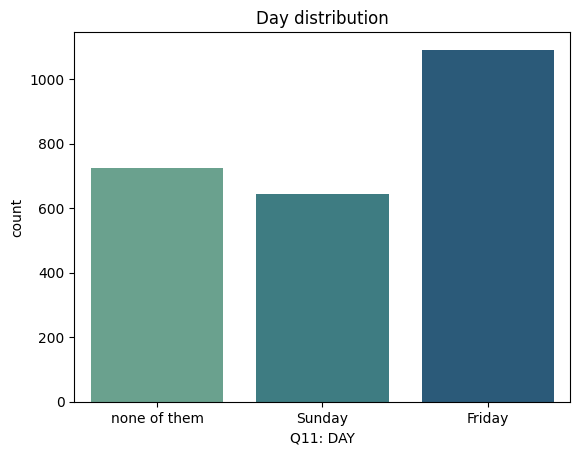

In [ ]:
sns.countplot(x='Q11: DAY', data=df,palette="crest")
plt.title('Day distribution')
plt.show()

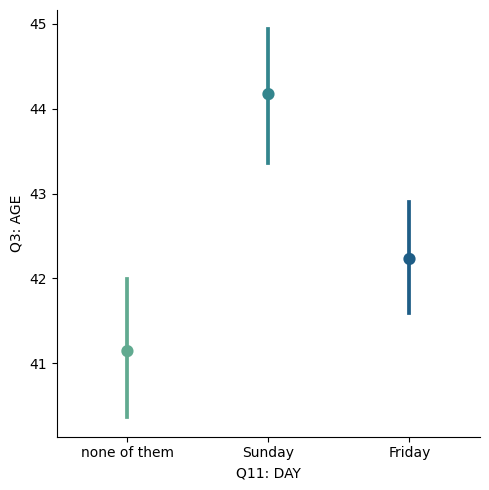

In [ ]:
sns.catplot(x='Q11: DAY',y='Q3: AGE',data=df,kind="point",palette="crest")
plt.show()

# cleaning country column

In [ ]:
df['Q4: COUNTRY']

0        NaN
1       USA 
2        USA
3         us
4        usa
        ... 
2455     USA
2456     USA
2457    USA 
2458     Usa
2459     usa
Name: Q4: COUNTRY, Length: 2460, dtype: object

In [ ]:
df['Q4: COUNTRY'].isnull().sum()

64

In [ ]:
df['Q4: COUNTRY'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

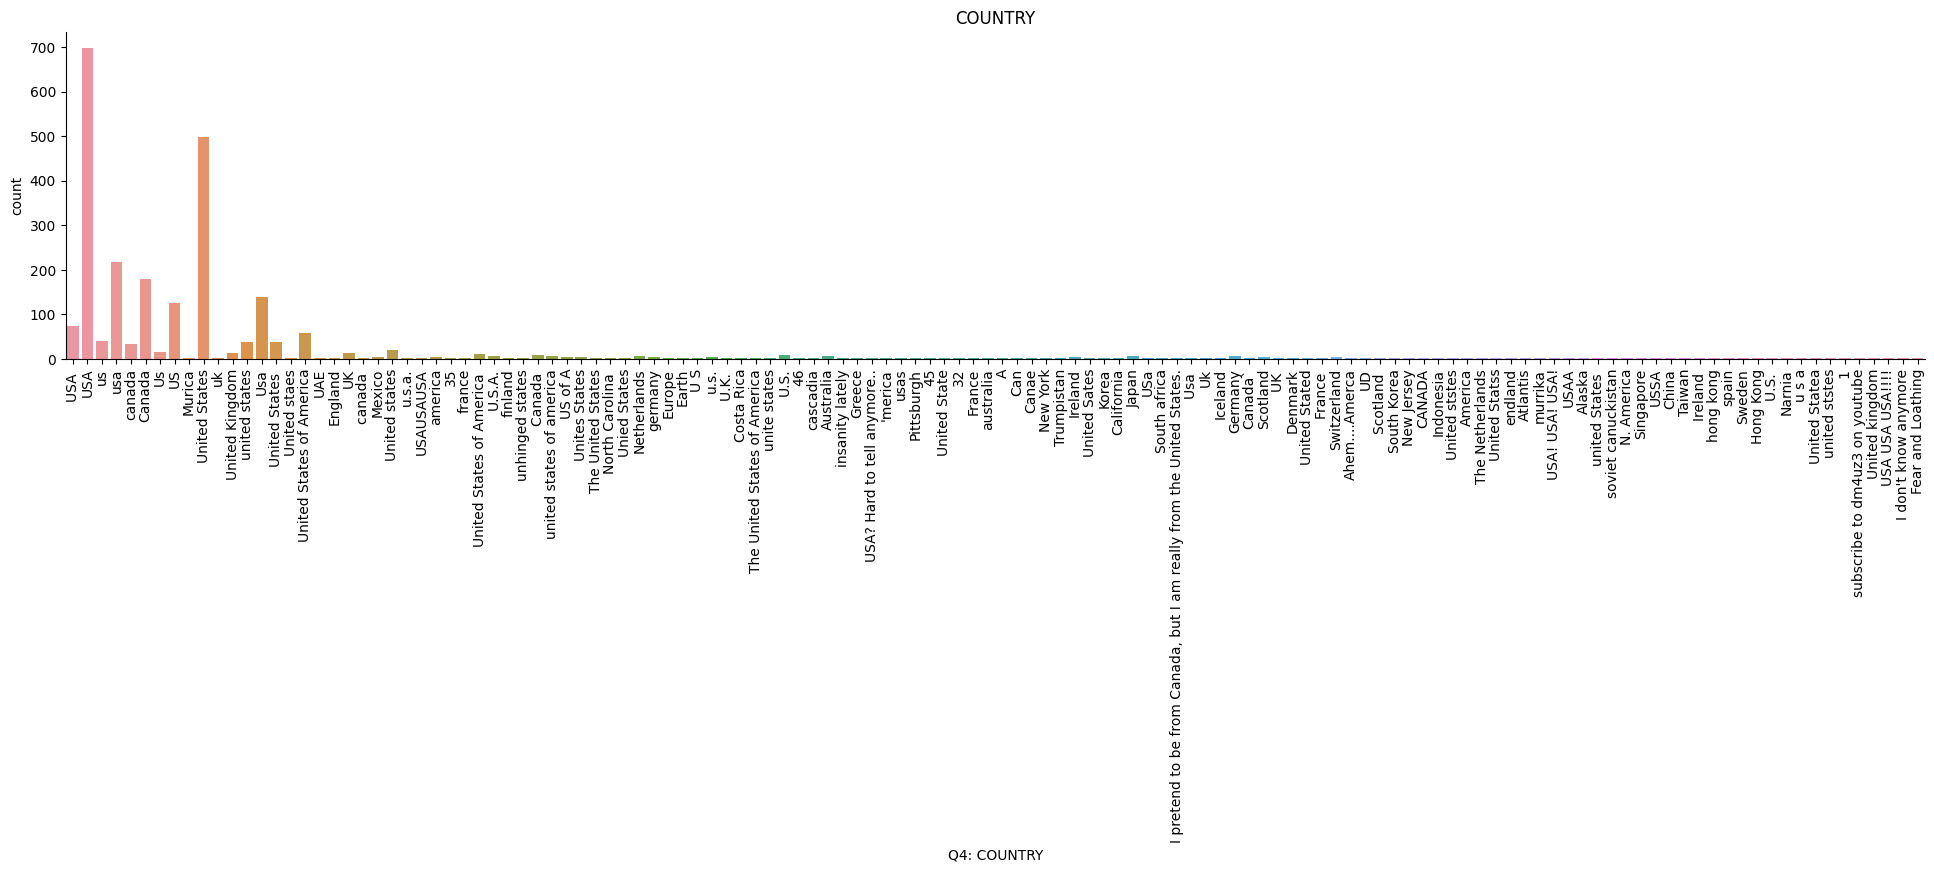

In [ ]:
sns.catplot(x="Q4: COUNTRY",data=df,kind="count", height=4, aspect=5);
plt.xticks(rotation=90);
plt.title('COUNTRY')
plt.show()

In [ ]:
df['Q4: COUNTRY'].value_counts()

USA                            699
United States                  497
usa                            217
Canada                         179
Usa                            139
                              ... 
usas                             1
'merica                          1
USA? Hard to tell anymore..      1
Greece                           1
Fear and Loathing                1
Name: Q4: COUNTRY, Length: 128, dtype: int64

In [ ]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip().str.lower()

In [ ]:
countries =['usa', 'united states', 'france', 'england', 'canada', 'egypt', 'china', 'mexico', 'germany', 'united kingdom', 'indonesia', 'korea', 'ireland', 'hong kong', 'spain', 'australia', 'netherlands', 'costa rica', 'japan', 'denmark', 'scotland', 'taiwan']
   
for COUNTRY in countries :
    matches = process.extract(COUNTRY, df['Q4: COUNTRY'], limit = df.shape[0])
    for potentail_match in matches :
       if potentail_match[1] >= 80 :
         df.loc[df['Q4: COUNTRY'] == potentail_match[0], 'Q4: COUNTRY'] = COUNTRY

In [ ]:
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'uae', 'england', 'mexico', 'u.s.a.', 'america',
       'france', 'finland', 'us of a', 'north carolina', 'netherlands',
       'germany', 'europe', 'earth', 'u.k.', 'costa rica', 'cascadia',
       'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'pittsburgh', 'canae',
       'new york', 'trumpistan', 'ireland', 'korea', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'ahem....amerca', 'ud', 'new jersey', 'indonesia', 'atlantis',
       'murrika', 'alaska', 'soviet canuckistan', 'n. america',
       'singapore', 'china', 'taiwan', 'hong kong', 'spain', 'sweden',
       'narnia', 'u s a', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [ ]:
df['Q4: COUNTRY'].value_counts().head(50)

usa                               1319
united states                      699
canada                             226
uk                                  18
united kingdom                      14
germany                             10
u.s.a.                               8
netherlands                          7
australia                            7
america                              6
scotland                             5
japan                                5
ireland                              5
mexico                               4
us of a                              4
switzerland                          3
france                               3
hong kong                            2
denmark                              2
china                                2
korea                                2
england                              2
sweden                               2
i don't know anymore                 1
ud                                   1
subscribe to dm4uz3 on yo

In [ ]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(['u.s.a.', 'united states', 'n. america', 'america', 'north carolina', 'us of a', 'new jersey', 'alaska', 'uae', 'usa? hard to tell anymore..', 'murica', 'california', 'murrika', 'new york', 'u.s.a.', 'ahem....amerca', 'u s a'], 'usa')
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(['uk', 'england', 'u.k.', 'ud'], 'united kingdom')

In [ ]:
df['Q4: COUNTRY'].value_counts()

usa                               2048
canada                             226
united kingdom                      36
germany                             10
australia                            7
netherlands                          7
scotland                             5
japan                                5
ireland                              5
mexico                               4
switzerland                          3
france                               3
hong kong                            2
korea                                2
china                                2
denmark                              2
sweden                               2
spain                                1
indonesia                            1
singapore                            1
narnia                               1
subscribe to dm4uz3 on youtube       1
soviet canuckistan                   1
i don't know anymore                 1
atlantis                             1
taiwan                   

In [ ]:
other = [x for x in df['Q4: COUNTRY'].unique()]
other.remove('usa')
other.remove('canada')
other.remove('united kingdom')
other.remove('germany')
other.remove('australia')
other.remove('netherlands')
other.remove('scotland')
other.remove('japan')
other.remove('ireland')
other.remove('mexico')
other.remove('switzerland')
other.remove('france')
print(other)

[nan, 'finland', 'europe', 'earth', 'costa rica', 'cascadia', 'insanity lately', 'greece', "'merica", 'pittsburgh', 'canae', 'trumpistan', 'korea', 'south africa', 'denmark', 'indonesia', 'atlantis', 'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong', 'spain', 'sweden', 'narnia', 'subscribe to dm4uz3 on youtube', "i don't know anymore", 'fear and loathing']


In [ ]:
df['Q4: COUNTRY']=df['Q4: COUNTRY'].replace(other,'Other')

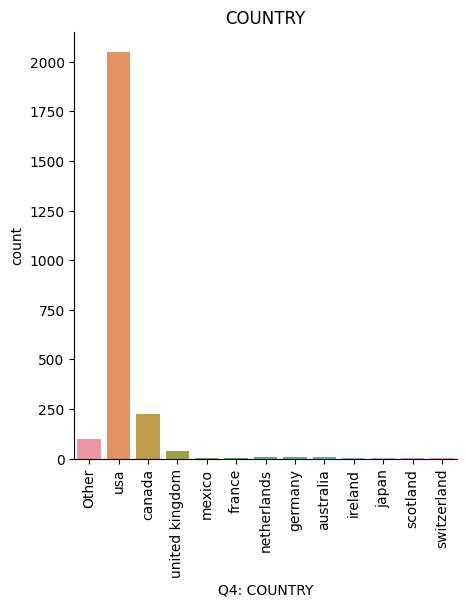

In [ ]:
sns.catplot(x="Q4: COUNTRY",data=df,kind="count");
plt.xticks(rotation=90);
plt.title('COUNTRY')
plt.show()

# cleaning Dress column

In [ ]:
df['Q10: DRESS'].value_counts()

White and gold    1081
Blue and black     635
Name: Q10: DRESS, dtype: int64

In [ ]:
df['Q10: DRESS'].isna().sum()

744

In [ ]:
df['Q10: DRESS'] = df['Q10: DRESS'].fillna('Other')

In [ ]:
df['Q10: DRESS'].isna().sum()

0

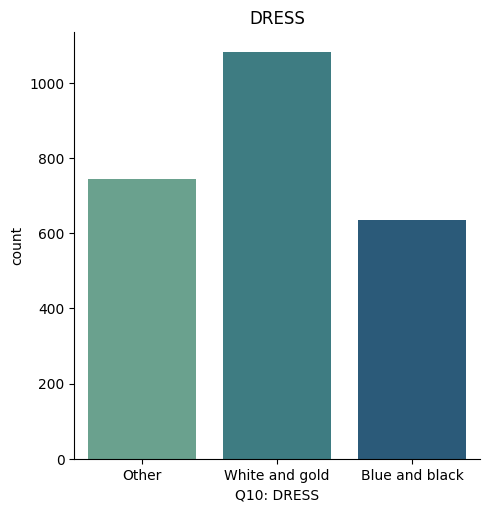

In [ ]:
sns.catplot(x="Q10: DRESS", data=df, kind= "count",palette="crest");
plt.title('DRESS')
plt.show()

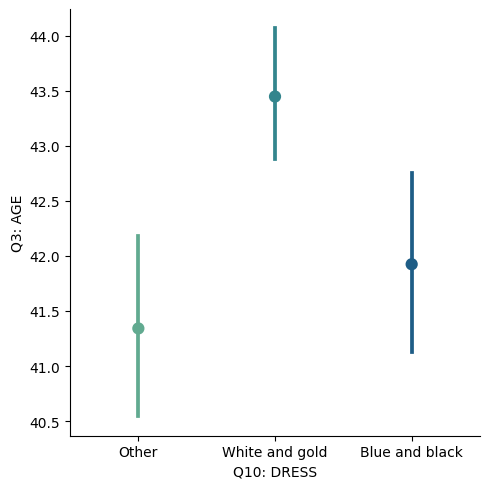

In [ ]:
sns.catplot(x="Q10: DRESS",y='Q3: AGE',data=df,kind="point",palette="crest")
plt.show()

# Candy

In [ ]:
df.iloc[:,6:-6]

,Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPA

In [ ]:
candy = df.iloc[:,6:-6]

In [ ]:
candy.isnull().sum()

Q6 | Any full-sized candy bar                                                   672
Q6 | Black Jacks                                                                958
Q6 | Bonkers (the candy)                                                        992
Q6 | Bonkers (the board game)                                                  1006
Q6 | Bottle Caps                                                                765
Q6 | Box'o'Raisins                                                              688
Q6 | Broken glow stick                                                          706
Q6 | Butterfinger                                                               682
Q6 | Cadbury Creme Eggs                                                         683
Q6 | Candy Corn                                                                 678
Q6 | Candy that is clearly just the stuff given out for free at restaurants     691
Q6 | Caramellos                                                             

In [ ]:
candy.describe()

,Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars
count,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,1782,1747,1766,1765,1434,1762,1518,1716,1515,1786,1724,1730,1774,1775,1742,1769,1735,1436,1731,1767,1772,1785,1789,1733,1731,1696,1647,1518,1736,1684,1649,1720,1716,1737,1762,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
freq,1559,793,857,715,670,1179,1625,1177,820,743,1325,953,1439,1040,644,761,592,1406,1433,664,1176,676,1176,703,708,742,1462,748,907,855,1069,1105,896,834,889,1061,747,956,1020,895,1435,570,1447,729,690,707,902,1277,931,1026,709,647,878,1185,1122,1291,1018,1001,972,757,693,759,644,904,857,805,769,1188,725,1085,1076,649,1480,1498,1136,706,1151,1151,829,729,605,1399,770,1140,853,783,754,763,613,754,1252,1058,1320,836,1413,1146,723,840


In [ ]:
for col in Q6_columns:
    most_freq = candy[col].value_counts().idxmax()
    candy[col].replace(np.nan,most_freq,inplace=True)

In [ ]:
candy.isnull().sum()

Q6 | Any full-sized candy bar                                                  0
Q6 | Black Jacks                                                               0
Q6 | Bonkers (the candy)                                                       0
Q6 | Bonkers (the board game)                                                  0
Q6 | Bottle Caps                                                               0
Q6 | Box'o'Raisins                                                             0
Q6 | Broken glow stick                                                         0
Q6 | Butterfinger                                                              0
Q6 | Cadbury Creme Eggs                                                        0
Q6 | Candy Corn                                                                0
Q6 | Candy that is clearly just the stuff given out for free at restaurants    0
Q6 | Caramellos                                                                0
Q6 | Cash, or other forms of

In [ ]:
df.fillna('OTHER',inplace=True)

In [ ]:
candy.isnull().sum()

Q6 | Any full-sized candy bar                                                  0
Q6 | Black Jacks                                                               0
Q6 | Bonkers (the candy)                                                       0
Q6 | Bonkers (the board game)                                                  0
Q6 | Bottle Caps                                                               0
Q6 | Box'o'Raisins                                                             0
Q6 | Broken glow stick                                                         0
Q6 | Butterfinger                                                              0
Q6 | Cadbury Creme Eggs                                                        0
Q6 | Candy Corn                                                                0
Q6 | Candy that is clearly just the stuff given out for free at restaurants    0
Q6 | Caramellos                                                                0
Q6 | Cash, or other forms of

In [ ]:
candy['Q6 | Any full-sized candy bar'].describe()

count     2460
unique       3
top        JOY
freq      2231
Name: Q6 | Any full-sized candy bar, dtype: object

In [ ]:
candy

,Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars
0,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
1,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR
2,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
3,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,D

In [85]:
candy_points = candy.replace(['JOY', 'MEH', 'DESPAIR', 'OTHER'], [2, 1, -1, 0])
candy_points.head(20)

,Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars
0,2,-1,1,1,1,-1,-1,2,2,-1,-1,2,2,2,-1,-1,1,-1,-1,-1,2,-1,-1,1,1,-1,-1,2,1,-1,2,2,2,2,-1,-1,2,-1,2,-1,-1,-1,2,1,1,1,-1,2,1,2,1,1,2,2,2,2,2,2,2,2,-1,1,1,2,2,-1,2,2,1,-1,-1,1,-1,2,2,1,2,-1,2,2,1,2,2,-1,2,2,2,-1,1,-1,-1,2,2,-1,2,-1,-1,2
1,2,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,2,1,-1,-1,-1,-1,-1,1,2,-1,-1,-1,-1,1,-1,1,1,-1,1,2,2,1,-1,-1,1,-1,-1,-1,-1,-1,2,-1,1,1,2,1,-1,-1,-1,1,1,2,2,1,2,2,2,2,-1,-1,1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,2,2,-1,2,-1,-1,-1,-1,1,-1,-1,1,-1,1,-1,-1,-1,-1,2,2,-1,2,-1,-1,-1
2,2,-1,1,1,1,-1,-1,2,2,-1,-1,2,2,2,-1,-1,1,-1,-1,-1,2,-1,-1,1,1,-1,-1,2,1,-1,2,2,2,2,-1,-1,2,-1,2,-1,-1,-1,2,1,1,1,-1,2,1,2,1,1,2,2,2,2,2,2,2,2,-1,1,1,2,2,-1,2,2,1,-1,-1,1,-1,2,2,1,2,-1,2,2,1,2,2,-1,2,2,2,-1,1,-1,-1,2,2,-1,2,-1,-1,2
3,2,1,1,-1,1,-1,-1,1,1,-1,-1,1,2,1,2,1,-1,-1,-1,2,2,1,1,2,2,1,-1,2,1,1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,2,2,1,2,2,-1,2,1,1,-1,2,1,2,1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,2,1,1,1,-1,-1,-1,1,2,1,-1,1,1,2,1,2,1,-1,-1,2,1,2,-1,2,2
4,2,-1,1,-1,1,-1,-1,1,1,-1,-1,2,1,2,-1,-1,1,-1,-1,1,2,-1,-1,-1,1,1,-1,2,1,-1,-1,2,1,1,-1,1,2,1,2,-1,-1,2,2,2,2,1,-1,2,1,1,-1,1,1,2,2,2,2,2,2,2,1,-1,2,2,1,-1,2,2,2,1,-1,2,-1,2,2,1,2,-1,2,2,-1,2,1,-1,2,2,1,-1,1,-1,-1,2,2,-1,2,1,2,2
5,2,-1,1,1,1,1,-1,2,-1,1,1,2,2,2,1,1,2,-1,1,1,2,-1,-1,1,2,1,-1,1,1,1,2,2,1,1,1,1,1,-1,2,-1,-1,-1,2,1,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,-1,2,2,2,2,1,2,1,1,-1,-1,1,-1,2,2,-1,2,-1,2,2,2,2,-1,-1,1,1,1,-1,1,1,-1,2,2,1,2,-1,-1,2
6,2,-1,1,1,1,-1,-1,2,2,-1,-1,2,2,2,-1,-1,1,-1,-1,-1,2,-1,-1,1,1,-1,-1,2,1,-1,2,2,2,2,-1,-1,2,-1,2,-1,-1,-1,2,1,1,1,-1,2,1,2,1,1,2,2,2,2,2,2,2,2,-1,1,1,2,2,-1,2,2,1,-1,-1,1,-1,2,2,1,2,-1,2,2,1,2,2,-1,2,2,2,-1,1,-1,-1,2,2,-1,2,-1,-1,2
7,2,-1,-1,1,2,1,2,2,2,2,-1,2,2,2,-1,1,1,-1,-1,1,1,2,-1,-1,-1,-1,-1,2,-1,-1,-1,2,1,1,-1,-1

In [90]:
candy_score_list = []
for i in candy_points.columns:
    candy_score = candy_points[i].sum()/candy_points[i].nunique()
    candy_score_list.append(candy_score)
scores_table = list(zip(list(candy_points.columns), candy_score_list))
candy_sys = pd.DataFrame(scores_table,columns=['candy name', 'candy score',])
candy_sys['candy name']=candy_sys['candy name'].apply(lambda z : z.strip('Q6 | '))
candy_sys.sort_values('candy score',ascending=False,inplace=True)
candy_sys.reset_index(inplace = True, drop = True)
candy_sys   

,candy name,candy score
0,Any full-sized candy bar,1552.333333
1,Kit Kat,1492.333333
2,"Cash, or other forms of legal tender",1483.000000
3,Reese’s Peanut Butter Cups,1482.333333
4,Twix,1473.666667
5,Snickers,1463.666667
6,Tolberone something or other,1439.333333
7,Lindt Truffle,1419.666667
8,Peanut M&M’s,1393.333333
9,Nestle Crunch,1380.666667


In [94]:
best_10 = candy_sys.nlargest(n=10, columns=['candy score'])
best_10

,candy name,candy score
0,Any full-sized candy bar,1552.333333
1,Kit Kat,1492.333333
2,"Cash, or other forms of legal tender",1483.000000
3,Reese’s Peanut Butter Cups,1482.333333
4,Twix,1473.666667
5,Snickers,1463.666667
6,Tolberone something or other,1439.333333
7,Lindt Truffle,1419.666667
8,Peanut M&M’s,1393.333333
9,Nestle Crunch,1380.666667


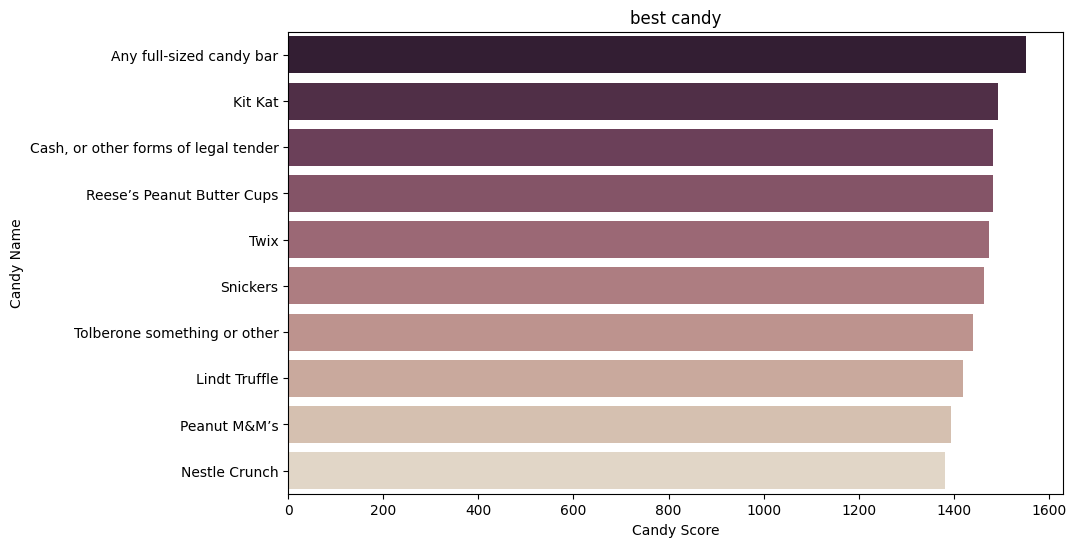

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(x='candy score', y='candy name', data=best_10, palette='ch:.25_r')
plt.title('best candy')
plt.xlabel('Candy Score')
plt.ylabel('Candy Name')
plt.show()

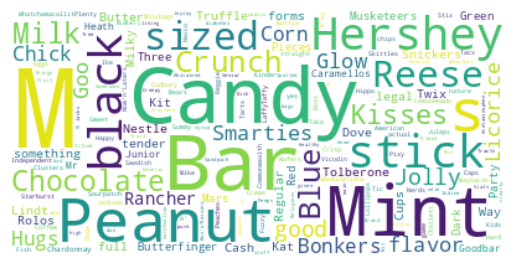

In [96]:
col = candy_sys['candy name']
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

The most loved candy is Any full-sized candy bar

In [104]:
worest_10 = candy_sys.nsmallest(n=10, columns = ['candy score'])
worest_10

,candy name,candy score
97,Broken glow stick,-726.000000
96,Real Housewives of Orange County Season 9 Blue...,-638.333333
95,Gum from baseball cards,-617.333333
94,Kale smoothie,-596.666667
93,Dental paraphenalia,-566.333333
92,Candy that is clearly just the stuff given out...,-511.000000
91,Creepy Religious comics/Chick Tracts,-504.666667
90,Spotted Dick,-485.333333
89,JoyJoy (Mit Iodine!),-476.000000
88,Those odd marshmallow circus peanut things,-442.333333


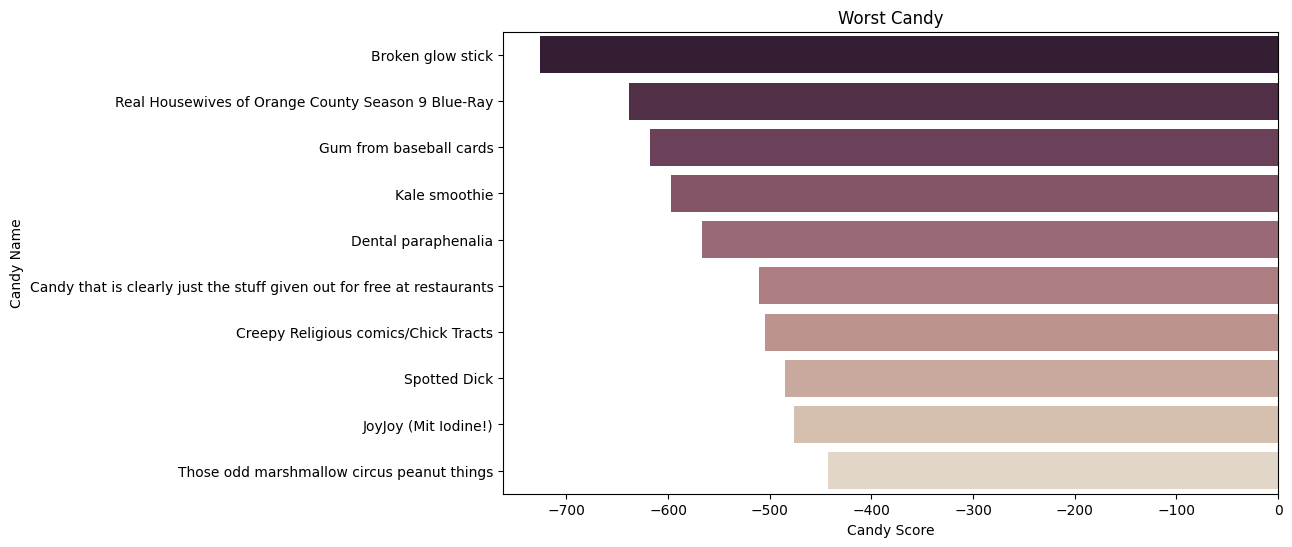

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='candy score', y='candy name', data=worest_10, palette='ch:.25_r')
plt.title('Worst Candy')
plt.xlabel('Candy Score')
plt.ylabel('Candy Name')
plt.show()

The most hated candy is Black Jacks

# and finally cleaning other comments columns

In [ ]:
df['Q9: OTHER COMMENTS'].value_counts()

other                                                                                                                                                                                                                                                                2074
nom nom nom!                                                                                                                                                                                                                                                            2
As I do not know what around half of those items (candy or otherwise) are, I do not think I took this servay to its fullest extent. Please also excuse my appreciation for Sour Patch.                                                                                  1
Vicodin really?                                                                                                                                                                                           

In [ ]:
df['Q9: OTHER COMMENTS'].isna().sum()

0

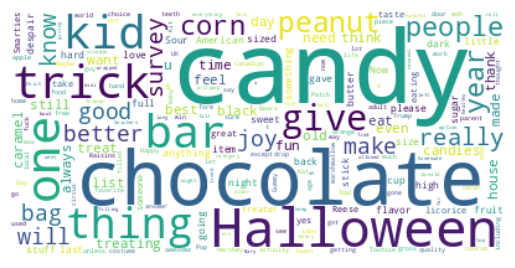

In [116]:
col = df['Q9: OTHER COMMENTS'].dropna()
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations= False, background_color='white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.show()


# Summary

*   first i drop the columns that have nan value More than half of its value

*   i impute the NaN values in going_out column with rather not to say and the most frequency responce *No*

*  Then with Gender i impute the NaN values with I'd rather not say and the most frequency responce *Male*

*  the age column had string so i was not able to convert to int , so i used pd.to_numeric to convert to numbers and the rows that was not able to convert became NaN, and mean age is *42*

*   with the country it was quite difficult to deal with all this NaN Values and missing value and i did some manual replacement, in the end i put all the odd values in other to make it easier for read, with the most frequency responce *usa*


*  the same with *day* and *dress* columns i impute the NaN values and the values with the most frequency responce

*   state column had too much nuique values so i dropped it

*  i go through each column of Q6 and impute the NaN values in each column with 'OTHER' value, then i made a score poinet to 
classification  the candy either it best or worest

*  in the end i visualized other comments after impute NaN value  

